In [14]:
from powerbispectrum import ComputePowerBiSpectrum
import numpy as np
from matplotlib import pyplot as plt
import hitomipy

In [2]:
h_fid = .6736
omega_b_fid = .02237
omega_cdm_fid = .12
n_s_fid = .9649
A_s_fid = 2.083e-9

params_cosmo = {
            'output': 'mPk',
            'h': h_fid,
            'omega_b': omega_b_fid,
            'omega_cdm': omega_cdm_fid,
            'n_s': n_s_fid,
            'A_s': A_s_fid,
            'tau_reio': 0.0544,
            'N_ncdm': 1.,
            'm_ncdm': 0.06,
            'N_ur': 2.0328,
            'z_max_pk': 3.,
            'P_k_max_h/Mpc': 50.,
            }
z = .8

In [6]:
Omega_b = omega_b_fid/h_fid**2
Omega_m = Omega_b + omega_cdm_fid/h_fid**2
Tcmb = 2.7255
cl = ComputePowerBiSpectrum(params_cosmo, z, diag=True)
cl.initial_power_spectrum()
hitomipy.initializeInputPowerSpectrum_py()
hitomipy.readInputPowerSpectrum_py(cl.k_in, cl.pk_in, len(cl.k_in))
hitomipy.readInputNoWigglePowerSpectrum_py(cl.k_in, cl.pk_in_no_wiggle, len(cl.k_in))
hitomipy.calcNormalizationUsingSigma8_py(cl.sigma8_norm)
hitomipy.calcNormalizationNoWiggle_py(1.0, h_fid, Omega_b, Omega_m, Tcmb, n_s_fid)

0.537054257431452


In [16]:
for i in np.linspace(.01, .3, 30):
    print(i, hitomipy.Sig2_py(cl.rs_drag,i/2)*i)

0.01 0.0007903387918374364
0.019999999999999997 0.018550565225316118
0.03 0.09869216538739864
0.039999999999999994 0.28054731859629445
0.049999999999999996 0.5679815366126851
0.05999999999999999 0.9320649715649183
0.06999999999999999 1.3272102278486981
0.07999999999999999 1.7131299844376984
0.08999999999999998 2.0719099776739967
0.09999999999999998 2.412061565878179
0.10999999999999997 2.759423166341449
0.11999999999999998 3.141260285655657
0.12999999999999998 3.5721223955345613
0.13999999999999999 4.047843729952018
0.15 4.549301352759528
0.15999999999999998 5.052765606106965
0.16999999999999998 5.541070343841525
0.18 6.0102604011173595
0.18999999999999997 6.469210724382134
0.19999999999999998 6.93332167720841
0.20999999999999996 7.416014205631216
0.21999999999999997 7.922298323245059
0.22999999999999998 8.447178266921838
0.23999999999999996 8.979044684688375
0.24999999999999997 9.505838366184147
0.25999999999999995 10.020725565638498
0.26999999999999996 10.524636583219502
0.2799999999

In [12]:
ks_2 = np.load('/home/rneveux/kernels/bk/z.8/k_1_20_ks_02/000/tree/b1_b1_b1.npy', allow_pickle=True).item()
ks_5 = np.load('/home/rneveux/kernels/bk/z.8/k_1_20/000/tree/b1_b1_b1.npy', allow_pickle=True).item()

(0.02, 0.08)

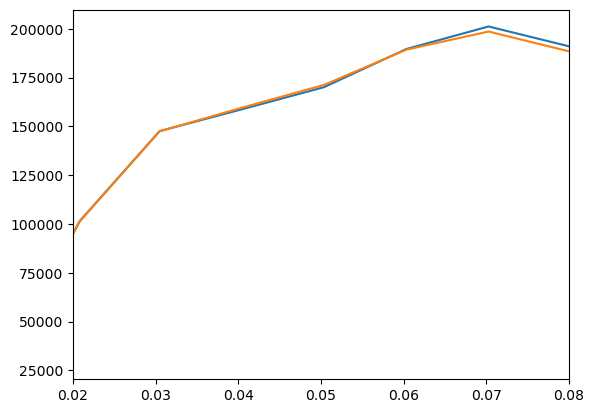

In [16]:
plt.plot(ks_2['kbin'], ks_2['kbin']**2*ks_2['K'])
plt.plot(ks_5['kbin'], ks_5['kbin']**2*ks_5['K'])
plt.xlim(.02,.08)